下面使用梯度下降算法来求解前面的线性回归问题，我们知道，对一元线性回归，损失函数为：

$$
loss = J(a, b) = \frac{1}{2n} \sum_{i=1}^{n}(y_i - (ax_i + b))^2
$$

针对上面的损失函数，假设选取一个初始点 $(a_0, b_0)$，然后沿着梯度方向对初始值进行更新得到 $(a_1, b_1)$：

$$
\begin{align}
a_1 &= a_0 - \eta \frac{\partial J(a, b)}{\partial a} \\
b_1 &= b_0 - \eta \frac{\partial J(a, b)}{\partial b} \\
\end{align}
$$

然后再对 $(a_1, b_1)$ 进行更新得到 $(a_2, b_2)$，以此类推，直到损失函数的值不再有显著变化，最终得到 $(a_k, b_k)$ 就是我们要求的参数，它使损失函数达到最小。其中 $\eta$ 是一个待确定的常数，通常被称为 **学习率**（learning rate），它是一个超参数。

上面的迭代过程一般写成下面的形式，其中的 $:=$ 表示使用右侧的值更新左侧的值：

$$
\begin{align}
a &:= a - \eta \frac{\partial J(a, b)}{\partial a} \\
b &:= b - \eta \frac{\partial J(a, b)}{\partial b} \\
\end{align}
$$

将损失函数带入上式求导，得到：

$$
\begin{align}
a &:= a - \eta \frac{1}{n} \sum_{i=1}^{n}(y_i - (ax_i + b))x_i \\
b &:= b - \eta \frac{1}{n} \sum_{i=1}^{n}(y_i - (ax_i + b))
\end{align}
$$

我们使用代码来实现这个过程，假设初始值 $(a_0, b_0) = (0, 0)$，学习率 $\eta = 0.1$。

In [78]:
import numpy as np

X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57])
Y = np.array([199,   290,   298,   310,   399,   420])

eta = 0.01
a = 0
b = 0

def gradient_update_a(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += (Y[i] - (a*X[i] + b))*X[i]
    return a - eta * s / X.size

def gradient_update_b(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += (Y[i] - (a*X[i] + b))
    return a - eta * s / X.size

a_new = gradient_update_a(X, Y, a, b)
b_new = gradient_update_b(X, Y, a, b)
print("a = {0}, b = {1}".format(a_new, b_new))

a = -148.76089999999996, b = -3.1933333333333334


上面是第一次迭代，我们再定义损失函数，然后计算之前的损失函数值和现在的损失函数值，判断是否已经收敛（两次损失函数的差值足够小，就认为收敛）：

In [79]:
def loss(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += (Y[i] - (a*X[i] + b))**2
    return s / 2 / X.size

diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
print("diff = {0}".format(diff))

diff = 25435393.956912696


很显然，这个差值还比较大，我们继续这个过程：

In [81]:
import numpy as np

X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57])
Y = np.array([199,   290,   298,   310,   399,   420])

eta = 0.01
a = 0
b = 0

for i in range(100):
    a_new = gradient_update_a(X, Y, a, b)
    b_new = gradient_update_b(X, Y, a, b)
    diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
    print("a = {0}, b = {1}, diff= {2}".format(a_new, b_new, diff))
    a = a_new
    b = b_new

a = -148.76089999999996, b = -3.1933333333333334, diff= 25435393.956912696
a = -3418.042080231555, b = -219.74179791999995, diff= 12307585216.628548
a = -75332.8851928837, b = -4980.237064353554, diff= 5955314011538.014
a = -1657252.5730300485, b = -109697.49900604598, diff= 2881618312409026.0
a = -36454935.393463075, b = -2413176.0466161952, diff= 1.394338578743231e+18
a = -801903863.6675248, b = -53083078.25447188, diff= 6.746834108975588e+20
a = -17639578510.551357, b = -1167675177.4151714, diff= 3.2646138597698585e+23
a = -388019988022.0889, b = -25685495291.124634, diff= 1.579659953283901e+26
a = -8535323616752.238, b = -565007013522.6543, diff= 7.643555027315778e+28
a = -187752568141807.84, b = -12428529083534.078, diff= 3.698513299279935e+31
a = -4130016438349338.0, b = -273391889802301.8, diff= 1.7896123696455236e+34
a = -9.084848186019032e+16, b = -6013835177700876.0, diff= 8.659459016172268e+36
a = -1.9984052798588884e+18, b = -1.3228707541655536e+17, diff= 4.190082261647534e

可以看到数据并没有按我们想的那个方向逼近，diff 值变得越来越大，说明损失函数没法收敛。我们试着将输入数据归一化：

In [82]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([39.93, 42.05, 43.18, 44.68, 49.87, 53.57]).reshape(-1,1)
Y = np.array([199,   290,   298,   310,   399,   420]).reshape(-1,1)

x_scalar = StandardScaler()
y_scalar = StandardScaler()
x_scalar.fit(X)
y_scalar.fit(Y)
X_standard = x_scalar.transform(X)
Y_standard = y_scalar.transform(Y)

eta = 0.01
a = 0
b = 0

for i in range(100):
    a_new = gradient_update_a(X_standard, Y_standard, a, b)
    b_new = gradient_update_b(X_standard, Y_standard, a, b)
    diff = abs(loss(X_standard, Y_standard, a, b) - loss(X_standard, Y_standard, a_new, b_new))
    print("a = {0}, b = {1}, diff= {2}".format(a_new, b_new, diff))
    a = a_new
    b = b_new

a = [-0.00958073], b = [-2.59052039e-18], diff= [0.00922493]
a = [-0.01925726], b = [-0.00958073], diff= [0.00945625]
a = [-0.02903056], b = [-0.01935307], diff= [0.00974087]
a = [-0.0389016], b = [-0.02922409], diff= [0.0100322]
a = [-0.04887134], b = [-0.03919384], diff= [0.01033033]
a = [-0.05894078], b = [-0.04926328], diff= [0.01063542]
a = [-0.06911091], b = [-0.05943341], diff= [0.01094761]
a = [-0.07938275], b = [-0.06970525], diff= [0.01126706]
a = [-0.08975731], b = [-0.0800798], diff= [0.01159393]
a = [-0.10023561], b = [-0.0905581], diff= [0.01192837]
a = [-0.11081869], b = [-0.10114119], diff= [0.01227055]
a = [-0.1215076], b = [-0.1118301], diff= [0.01262063]
a = [-0.13230341], b = [-0.12262591], diff= [0.01297878]
a = [-0.14320717], b = [-0.13352967], diff= [0.01334518]
a = [-0.15421997], b = [-0.14454247], diff= [0.01371999]
a = [-0.1653429], b = [-0.15566539], diff= [0.01410341]
a = [-0.17657705], b = [-0.16689955], diff= [0.0144956]
a = [-0.18792355], b = [-0.17824605

/home/aneasystone/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/aneasystone/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### 梯度下降的一般形式

回到线性回归的一般形式，损失函数可以写成下面这样：

$$
loss = J(\theta) = (\bf{y}-\rm{X}\theta)^T (\bf{y}-\rm{X}\theta)
$$

根据前面的矩阵求导，得到梯度下降的更新公式为：

$$
\begin{aligned}
\theta &:= \theta - \eta \frac{\partial}{\partial\theta}J(\theta) \\
       &= \theta - \eta X^T(\bf{y}-\rm{X}\theta)
\end{aligned}
$$


### 标准化和归一化

在实际的运用中我们选取的特征，比如长度，重量，面积等等，通常单位和范围都不同，这会导致梯度下降算法变慢，所以我们要将特征缩放到相对统一的范围内。通常的方法有 **标准化（Standardization）** 和 **归一化（Normalization）**。

标准化是把数据变成符合标准的正态分布，由 **中心极限定理** 可知，当数据量足够大时，无论原来的数据是何种分布，都可以通过下面的更新公式转变成正态分布：

$$
x_i := \frac{x_i-\mu}{\delta}
$$

归一化对梯度下降算法很友好，可以让算法最终收敛并且提高训练速度和精度，归一化的更新公式为：

$$
x_i := \frac{x_i-min(x_i)}{max(x_i)-min(x_i)}
$$

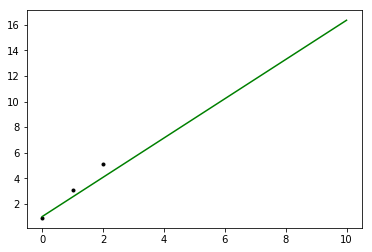

In [117]:
model = SGDRegressor(max_iter=100000, tol=0.01)
model.fit(X.reshape(-1,1), Y.ravel())

plt.plot(X, Y, 'k.')

x = [[0],[10]]
y = model.predict(x)

plt.plot(x, y, 'g-')
plt.show()

In [99]:
def loss(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += (Y[i] - (a*X[i] + b))**2
    return s

def update_a(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += (Y[i] - (a*X[i] + b))*X[i]
    return a - eta * s

def update_b(X, Y, a, b):
    s = 0
    for i in range(X.size):
        s += (Y[i] - (a*X[i] + b))
    return a - eta * s

X = np.array([0,1,2])
Y = np.array([0.9, 3.1, 5.1])

a = 2
b = 1
eta = 0.01

for i in range(100):
    a_new = update_a(X, Y, a, b)
    b_new = update_b(X, Y, a, b)
    loss_new = loss(X, Y, a_new, b_new)
    diff = abs(loss(X, Y, a, b) - loss(X, Y, a_new, b_new))
    print("a = {0}, b = {1}, loss = {2}, diff= {3}".format(a_new, b_new, loss_new, diff))
    a = a_new
    b = b_new

a = 1.997, b = 1.999, loss = 2.808066000000002, diff= 2.778066000000002
a = 2.02382, b = 2.02588, loss = 3.1172770548000006, diff= 0.30921105479999866
a = 2.0527874, b = 2.054311, loss = 3.470038981045202, diff= 0.35276192624520153
a = 2.0840561, b = 2.0850003520000002, loss = 3.8767760893829095, diff= 0.4067371083377074
a = 2.1178089155600004, b = 2.1181277935600002, loss = 4.346065619973978, diff= 0.4692895305910687
a = 2.1542431951448004, b = 2.1538870168336004, loss = 4.887872560515324, diff= 0.5418069405413455
a = 2.1935719654070485, b = 2.1924871015041525, loss = 5.513778822938285, diff= 0.6259062624229612
a = 2.2360251767225257, b = 2.2341537374143847, loss = 6.237248033295764, diff= 0.7234692103574787
a = 2.2818510476810836, b = 2.279130544146633, loss = 7.07393387879485, diff= 0.836685845499086
a = 2.3313175163895368, b = 2.327680495435915, loss = 8.042039194134563, diff= 0.9681053153397139
a = 2.384713807072091, b = 2.3800874567443002, loss = 9.162734153415485, diff= 1.120694